<a href="https://colab.research.google.com/github/drskprabhakar/Axial-Length-Prediction-ML-Regression-mode/blob/main/axial_length_prediction_model_Koscon_2023_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

# Loading the dataset file from Google Drive

In [3]:
df = pd.read_excel('/content/drive/MyDrive/Axial length prediction dataset.xlsx')

# Exploratory data analysis

In [5]:
# find rows and columns
df.shape

(108, 3)

In [6]:
# find first 5 rows and columns
df.head()

,KH,KV,AL
0,41.5,40.50,20.30
1,41.5,40.50,20.56
2,41.5,40.50,20.61
3,41.5,40.75,20.79
4,42.0,41.00,21.10


In [7]:
# find last 5 rows and columns
df.tail()

,KH,KV,AL
103,47.25,47.0,23.90
104,47.50,47.5,24.00
105,47.50,47.5,24.04
106,47.75,48.0,24.08
107,47.75,48.5,24.20


In [9]:
# find descriptive statistics
df.describe()

,KH,KV,AL
count,108.000000,108.000000,108.000000
mean,44.756481,44.129167,22.704167
std,1.551636,1.760219,0.791164
min,41.500000,40.500000,20.300000
25%,43.500000,42.750000,22.305000
50%,44.750000,44.000000,22.775000
75%,46.000000,45.500000,23.222500
max,47.750000,48.500000,24.200000


In [10]:
df.info() # Info code for exploring missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   KH      108 non-null    float64
 1   KV      108 non-null    float64
 2   AL      108 non-null    float64
dtypes: float64(3)
memory usage: 2.7 KB


In [11]:
df.isnull().sum() # For showing the null values

KH    0
KV    0
AL    0
dtype: int64

Text(0.5, 1.0, 'Dataset scatter plot')

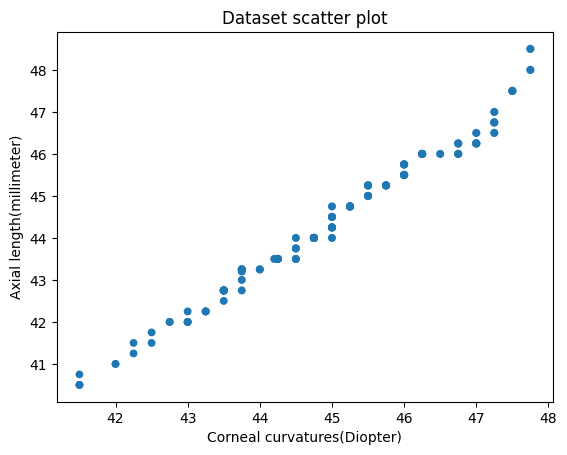

In [13]:
# plotting scatter plot for visualising data distribution of corneal curvatures before outliers removal
plt.scatter(df.KH, df.KV, df.AL)
plt.xlabel('Corneal curvatures(Diopter)')
plt.ylabel('Axial length(millimeter)')
plt.title('Dataset scatter plot')

<Axes: >

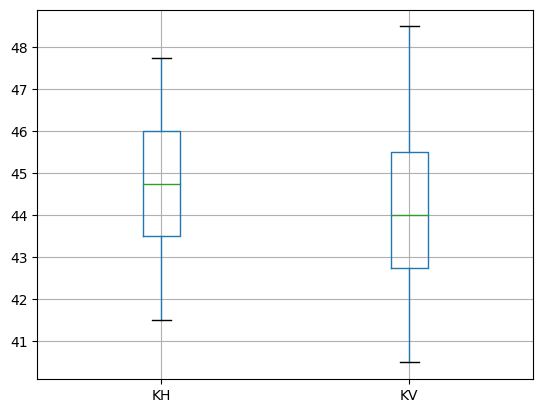

In [14]:
# creating Box and Whiskers plots for corneal curvatures
df.boxplot(['KH','KV'])

<Axes: >

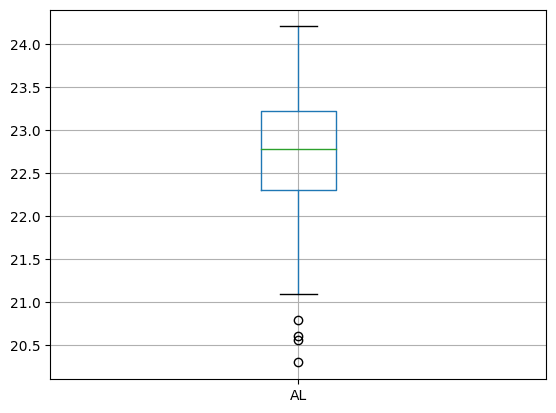

In [15]:
# creating Box and Whiskers plots for axial length
df.boxplot(['AL'])

<Axes: >

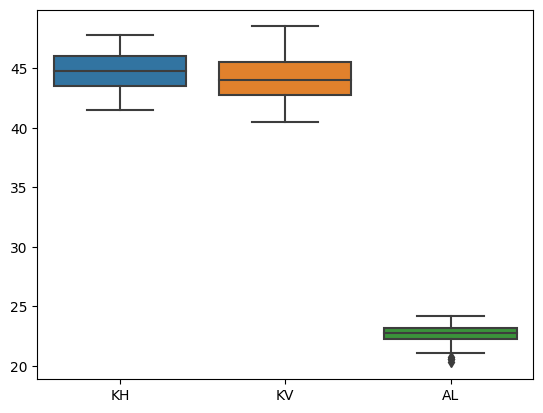

In [16]:
sns.boxplot(df)

# Finding Interquartile range

In [17]:
Q1 = df.AL.quantile(0.25)
Q2 = df.AL.quantile(0.50)
Q3 = df.AL.quantile(0.75)
Q1, Q2,Q3

(22.305, 22.775, 23.2225)

In [18]:
IQR = Q3-Q1
IQR

0.9175000000000004

In [19]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
lower_limit, upper_limit

(20.92875, 24.598750000000003)

In [20]:
df[(df.AL<lower_limit)|(df.AL>upper_limit)]

,KH,KV,AL
0,41.5,40.50,20.30
1,41.5,40.50,20.56
2,41.5,40.50,20.61
3,41.5,40.75,20.79


In [21]:
df_no_outliers = df[(df.AL>lower_limit)&(df.AL<upper_limit)]
df_no_outliers

,KH,KV,AL
4,42.00,41.00,21.10
5,42.00,41.00,21.25
6,42.25,41.25,21.38
7,42.25,41.50,21.46
8,42.50,41.50,21.50
...,...,...,...
103,47.25,47.00,23.90
104,47.50,47.50,24.00
105,47.50,47.50,24.04
106,47.75,48.00,24.08


In [22]:
df_no_outliers.describe()

,KH,KV,AL
count,104.000000,104.000000,104.000000
mean,44.881731,44.266346,22.786442
std,1.439931,1.644754,0.681550
min,42.000000,41.000000,21.100000
25%,43.750000,43.150000,22.380000
50%,44.875000,44.000000,22.825000
75%,46.000000,45.500000,23.237500
max,47.750000,48.500000,24.200000


Text(0.5, 1.0, 'Dataset scatter plot')

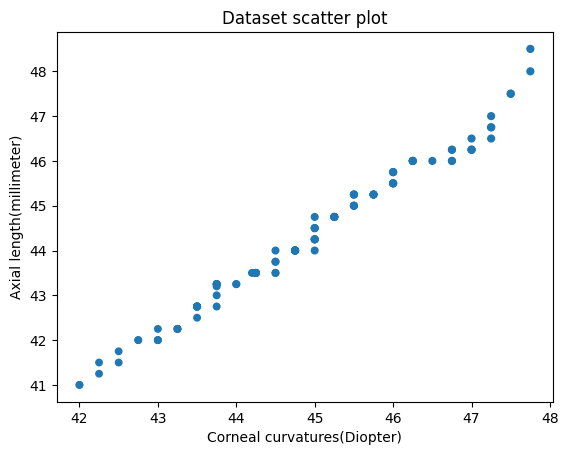

In [23]:
# plotting scatter plot for visualising data distribution of corneal curvatures after outliers removal
plt.scatter(df_no_outliers.KH, df_no_outliers.KV, df_no_outliers.AL)
plt.xlabel('Corneal curvatures(Diopter)')
plt.ylabel('Axial length(millimeter)')
plt.title('Dataset scatter plot')

<Axes: >

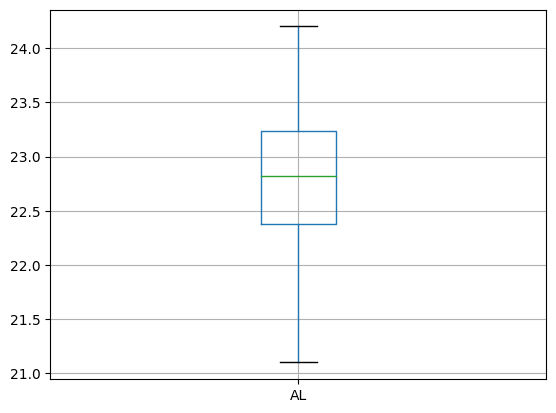

In [24]:
df_no_outliers.boxplot('AL')

In [25]:
df_no_outliers.describe()

,KH,KV,AL
count,104.000000,104.000000,104.000000
mean,44.881731,44.266346,22.786442
std,1.439931,1.644754,0.681550
min,42.000000,41.000000,21.100000
25%,43.750000,43.150000,22.380000
50%,44.875000,44.000000,22.825000
75%,46.000000,45.500000,23.237500
max,47.750000,48.500000,24.200000


# Correlation matrix

<Axes: >

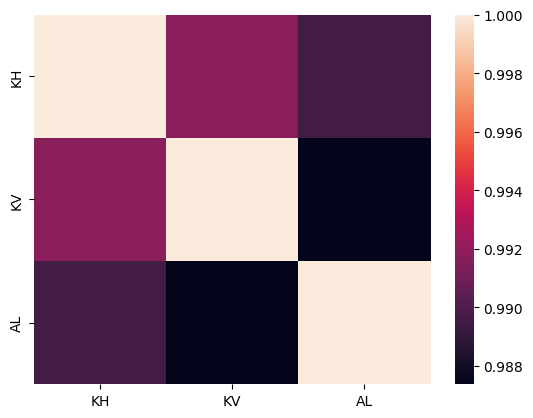

In [26]:
# constucting heat map for correlation matrix
sns.heatmap(df_no_outliers.corr())

In [27]:
df_no_outliers.corr()

,KH,KV,AL
KH,1.000000,0.991751,0.989643
KV,0.991751,1.000000,0.987376
AL,0.989643,0.987376,1.000000


# dataset histograms

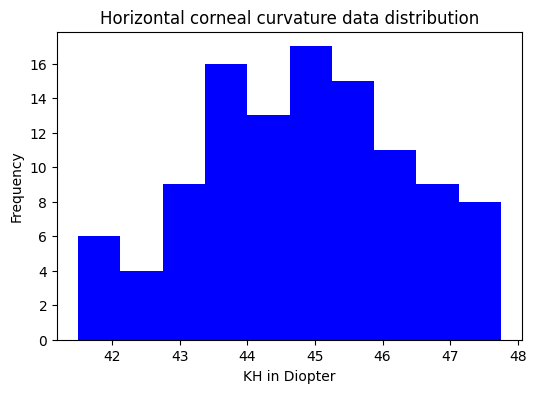

In [28]:
plt.figure(figsize = (6, 4))
x = df.KH
plt.hist(x, bins = 10, color = "blue")
plt.title("Horizontal corneal curvature data distribution")
plt.xlabel("KH in Diopter")
plt.ylabel("Frequency")
plt.show()

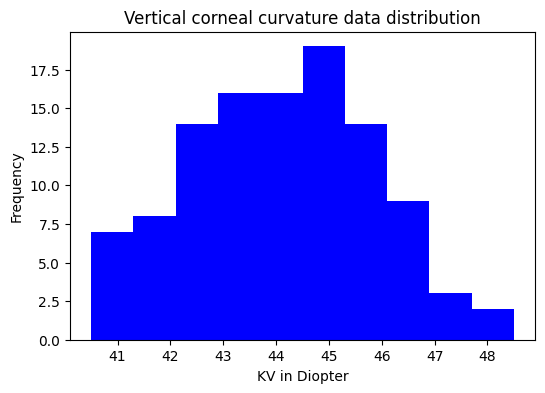

In [29]:
plt.figure(figsize = (6, 4))
x = df.KV
plt.hist(x, bins = 10, color = "blue")
plt.title("Vertical corneal curvature data distribution")
plt.xlabel("KV in Diopter")
plt.ylabel("Frequency")
plt.show()


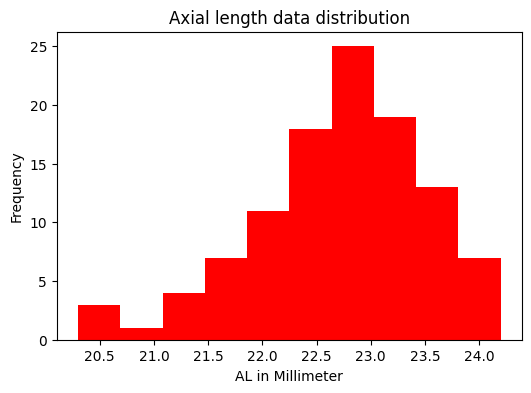

In [30]:
plt.figure(figsize = (6, 4))
x = df.AL
plt.hist(x, bins = 10, color = "red")
plt.title("Axial length data distribution")
plt.xlabel("AL in Millimeter")
plt.ylabel("Frequency")
plt.show()

# Define x (independent) and y (dependent) variables

In [33]:
X = df_no_outliers.drop(['AL'], axis=1).values
y = df_no_outliers['AL'].values

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_true = train_test_split(X,y,test_size=0.3, random_state=42)

# Fitting the model for training

In [34]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

# Prediction on X_test

In [35]:
actual = y_true
predicted = model.predict(X_test)
predicted

array([22.29716676, 22.97230539, 22.97230539, 22.83210933, 22.71958622,
       23.73229417, 23.64744402, 22.71958622, 21.90425153, 21.45415911,
       22.1569707 , 22.38201691, 23.61977106, 23.75996713, 23.30987471,
       21.67920532, 23.33754767, 22.47756998, 22.01677463, 22.29163217,
       23.87249023, 22.83210933, 22.1569707 , 23.30987471, 22.71958622,
       23.1973516 , 22.12929774, 22.60706312, 22.57939016, 21.90425153,
       23.45007077, 21.93192449])

In [36]:
print(model.coef_)

[0.33940058 0.11069184]


In [37]:
print(model.intercept_)

2.660969259299602


In [38]:
from sklearn import metrics
metrics.mean_absolute_error(actual, predicted)

0.07325590463738019

In [39]:
metrics.mean_squared_error(actual, predicted)

0.010054986463909728

In [ ]:
np.sqrt(metrics.mean_squared_error(actual, predicted))

In [42]:
np.sqrt(metrics.mean_squared_error(actual, predicted))

0.10027455541616591

# Evaluate the model for accuracy

In [43]:
from sklearn.metrics import r2_score
r2_score(actual, predicted)

0.9781463397395095

Text(0.5, 1.0, 'Actual vs Predicted axial length')

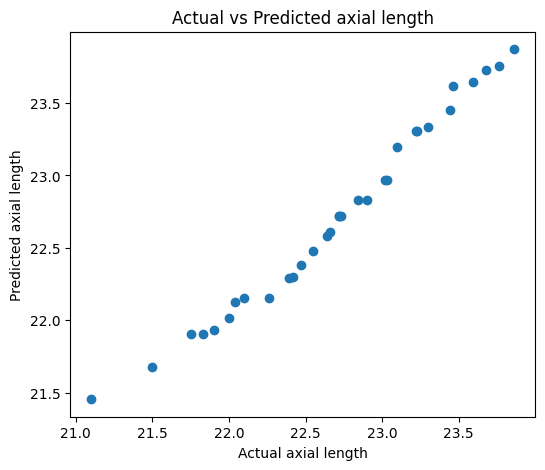

In [44]:
plt.figure(figsize=(6,5))
plt.scatter(actual,predicted)
plt.xlabel('Actual axial length')
plt.ylabel('Predicted axial length')
plt.title('Actual vs Predicted axial length')

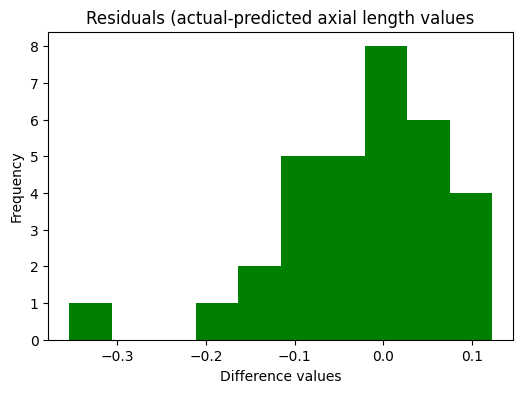

In [45]:
plt.figure(figsize = (6, 4))
plt.hist(actual-predicted, bins=10, color = "green")
plt.title("Residuals (actual-predicted axial length values")
plt.xlabel("Difference values")
plt.ylabel("Frequency")
plt.show()

In [46]:
pred_y_df = pd.DataFrame({'Actual value':y_true, 'Predicted value':predicted,
                         'Difference': actual-predicted})
pred_y_df[0:20]

,Actual value,Predicted value,Difference
0,22.42,22.297167,0.122833
1,23.03,22.972305,0.057695
2,23.02,22.972305,0.047695
3,22.84,22.832109,0.007891
4,22.72,22.719586,0.000414
5,23.68,23.732294,-0.052294
6,23.59,23.647444,-0.057444
7,22.73,22.719586,0.010414
8,21.83,21.904252,-0.074252
9,21.10,21.454159,-0.354159


# Axial length prediction by new set of Kh and Kv values

In [ ]:
model.predict([[43,44]])

array([22.11582711])

# Predictive model equation y=mx+b
# AL = m1(x1) + m2(x2) + b
# AL = m1(Kh) + m2(Kv) + b
# AL = 0.339(Kh) + 0.111(Kv) + 2.66
